# Downloading the ZIP File and Extracting it. 

In [1]:
!wget https://www.dropbox.com/s/1ewy9gw42sty8pt/cxr_plaksha_assignment_qure.zip?dl=0

--2022-02-21 12:29:57--  https://www.dropbox.com/s/1ewy9gw42sty8pt/cxr_plaksha_assignment_qure.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/1ewy9gw42sty8pt/cxr_plaksha_assignment_qure.zip [following]
--2022-02-21 12:29:58--  https://www.dropbox.com/s/raw/1ewy9gw42sty8pt/cxr_plaksha_assignment_qure.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9c42fbcbb8424f0dd6aa40ea4d.dl.dropboxusercontent.com/cd/0/inline/BgL7zVPTMFeB7DSuDrK_itZFliPVb7Z7Xuf6yqQYnIDWljeq-87b1kI8TnpsWutCisRCw1dxONzAvS9MlbXW8t8F23EKAjy3z9CG6u46OxX6z0WnCgW6S8nrrwPChPjltA37FGtNndzU13RzFPZWN_UC/file# [following]
--2022-02-21 12:29:58--  https://uc9c42fbcbb8424f0dd6aa40ea4d.dl.dropboxusercontent.com/cd/0/inline/BgL7zVPTMFeB7DSuDrK_itZFliPV

In [2]:
  !unzip cxr_plaksha_assignment_qure.zip?dl=0

Streaming output truncated to the last 5000 lines.
  inflating: cxr_plaksha_assignment_qure/17686.png  
  inflating: cxr_plaksha_assignment_qure/3968.png  
  inflating: cxr_plaksha_assignment_qure/19873.png  
  inflating: cxr_plaksha_assignment_qure/16598.png  
  inflating: cxr_plaksha_assignment_qure/15091.png  
  inflating: cxr_plaksha_assignment_qure/6810.png  
  inflating: cxr_plaksha_assignment_qure/433.png  
  inflating: cxr_plaksha_assignment_qure/12926.png  
  inflating: cxr_plaksha_assignment_qure/355.png  
  inflating: cxr_plaksha_assignment_qure/13386.png  
  inflating: cxr_plaksha_assignment_qure/12098.png  
  inflating: cxr_plaksha_assignment_qure/8183.png  
  inflating: cxr_plaksha_assignment_qure/1819.png  
  inflating: cxr_plaksha_assignment_qure/10857.png  
  inflating: cxr_plaksha_assignment_qure/11591.png  
  inflating: cxr_plaksha_assignment_qure/4961.png  
  inflating: cxr_plaksha_assignment_qure/10843.png  
  inflating: cxr_plaksha_assignment_qure/11585.png  
  in

### Process

Now that the file is downloaded and extracted,and since the size is more than 15GB which is greater than the free tier in Google drive, converting the same into a numpy array. 

- In this process we are reading all the files in the traininig set, which is 16000 images. 
- We resize the images to 400x 400 and store them in the form of two numpy arrays. By this process we are able to reduce the data to 7GB. 

In [4]:
# Importing the libraries
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np
import shutil
from tqdm import tqdm
import seaborn as sns
import random

files=pd.read_csv('consolidation_train_gt.csv')

## Analysing the train dataset


In [5]:
files.head(10)

,filename,consolidation,consolidation-left,consolidation-right
0,19047,0,0,0
1,17924,0,0,0
2,11658,0,0,0
3,10733,0,0,0
4,15041,0,0,0
5,16966,0,0,0
6,14833,0,0,0
7,18117,0,0,0
8,485,1,0,1
9,10458,0,0,0


# Visualization of the dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


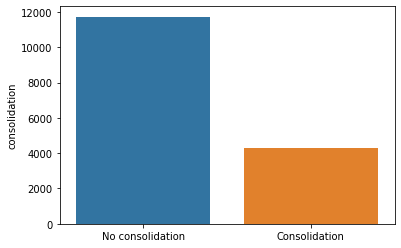

In [ ]:
sns.barplot(['No consolidation', 'Consolidation'],files['consolidation'].value_counts())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


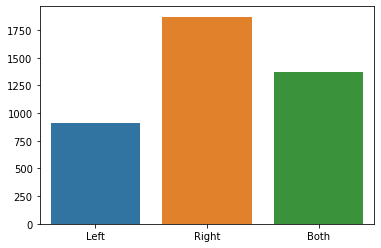

In [ ]:
left=0
right=0
both=0

for i,row in files.iterrows():
  if ((row['consolidation-left']==1) & (row['consolidation-right']==1)):
    both+=1
  elif (row['consolidation-left']==1) :
    left+=1
  elif (row['consolidation-right']==1):
    right+=1

sns.barplot(['Left','Right','Both'],[left,right,both])

- It can be seen that there is a high imbalance in dataset. 
- Inorder to balance this we can either create images synthetically or drop a few of the negative images 
- Inorder to get a balanced dataset, we will be taking all of the positive images and same number of negative xrays which are randomly sampled


In [ ]:
positive_files=files[files['consolidation']==1]['filename'].index
negative_files=files[files['consolidation']==0]['filename'].index
print(len(negative_files) ,'  negative files')
print(len(positive_files) ,' positive files')

11726   negative files
4274  positive files


In [ ]:
negative_files=random.sample(list(negative_files),len(positive_files))
print(len(negative_files) ,'  negative files after balancing')
print(len(positive_files) ,' positive files after balancing')

4274   negative files after balancing
4274  positive files after balancing


In [ ]:
xray_files=np.append(positive_files,negative_files)
del positive_files
del negative_files
print(len(xray_files), 'training samples will be used')

8548 training samples will be used


In [ ]:
from sklearn.utils import shuffle
xray_files=shuffle(xray_files)
train=xray_files[0:int(len(xray_files)*0.8)]
test=xray_files[int(len(xray_files)*0.8):]

print('Train data : ',len(train))
print('Test data: ',len(test))

Train data :  6838
Test data:  1710


In [ ]:
train_df = files.iloc[train]
test_df = files.iloc[test]

In [ ]:

train_df.head()


,filename,consolidation,consolidation-left,consolidation-right
15110,19335,0,0,0
3046,1455,1,0,1
13063,748,1,1,0
14708,2251,1,-100,-100
6149,11315,0,0,0


In [ ]:
filenames=train_df['filename'].values
images=[]
binary=[]
detailed=[]
file_path='cxr_plaksha_assignment_qure/'
for file in tqdm(filenames[0:3000]):
  file_name=str(file)+'.png'
  try:
      image=cv2.imread(file_path+file_name)
      image= cv2.resize(image,(200,200))
      image_array=np.array(image)
      image_array=image_array/255
      images.append(image_array)
      del image_array
      binary.append(train_df[train_df['filename']==file]['consolidation'].values[0])
      detailed.append([train_df[train_df['filename']==file]['consolidation-left'].values[0],train_df[train_df['filename']==file]['consolidation-right'].values[0]])
  except:
      print(file,' not found')
np.savez('/content/drive/MyDrive/Colab Notebooks/Covid Chest Xray/train1.npz',data=np.array(images),label=np.array(binary),consolidation=np.array(detailed))

100%|██████████| 3000/3000 [01:39<00:00, 30.24it/s]


In [ ]:
filenames=test_df['filename'].values
images=[]
binary=[]
detailed=[]
file_path='cxr_plaksha_assignment_qure/'
for file in tqdm(filenames):
  file_name=str(file)+'.png'
  try:
      image=cv2.imread(file_path+file_name)
      image= cv2.resize(image,(200,200))
      image=cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
      image=np.array(image)
      images.append(image)
      binary.append(test_df[test_df['filename']==file]['consolidation'].values[0])
      detailed.append([test_df[test_df['filename']==file]['consolidation-left'].values[0],test_df[test_df['filename']==file]['consolidation-right'].values[0]])
  except:
      print(file,' not found')
np.savez('/content/drive/MyDrive/Colab Notebooks/Covid Chest Xray/test1.npz',data=np.array(images),label=np.array(binary),consolidation=np.array(detailed))

100%|██████████| 1710/1710 [01:49<00:00, 15.68it/s]


### Saving the npz files to google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
for file in tqdm(os.listdir()):
  try:
    if file.split('.')[1]=='npz':
      shutil.copy(file,'/content/drive/MyDrive/Colab Notebooks/Covid Chest Xray')
  except:
    pass

100%|██████████| 7/7 [00:11<00:00,  1.68s/it]


## Misc


In [6]:
# Seperating the test dataset
from tqdm import tqdm

file_list=files['filename']
import os
images=[]
for file in tqdm(os.listdir('/content/cxr_plaksha_assignment_qure')):
  try:
    if file.split('.')[1]=='png':
      if int(file.split('.')[0]) not in file_list:
        images.append(np.array(cv2.resize(cv2.imread('/content/cxr_plaksha_assignment_qure/'+file),(200,200))))
  except:
    print(file)


100%|██████████| 20000/20000 [02:18<00:00, 144.23it/s]


In [ ]:
# Seperating the test dataset
from tqdm import tqdm

file_list=files['filename']
import os
file_names=[]
for file in tqdm(os.listdir('/content/cxr_plaksha_assignment_qure')):
  try:
    if file.split('.')[1]=='png':
      if int(file.split('.')[0]) not in file_list:
        file_names.append(file)
  except:
    print(file)


100%|██████████| 20000/20000 [00:00<00:00, 402557.21it/s]


In [ ]:
print(len(images),len(file_names))

4000 4000


In [ ]:
np.savez('/content/drive/MyDrive/Colab Notebooks/Covid Chest Xray/test_images1.npz',data=images,filename=file_names)